Доверительный интервал для среднего значения — это диапазон значений, который может содержать среднее значение генеральной совокупности с определенным уровнем достоверности.

https://www.codecamp.ru/blog/confidence-intervals-python/

In [3]:
import numpy as np
import scipy.stats as st

#define sample data
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_17308\3288540032.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


(16.75776979778498, 24.042230202215016)

In [2]:
from numpy import sqrt
from scipy import stats
p = 0.99
mean = 10
std = 5
n = 100
se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonfidence_interval = mean - sigma*se, mean + sigma*se
print('[%.2f; %.2f]' % сonfidence_interval)


[8.71; 11.29]


Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


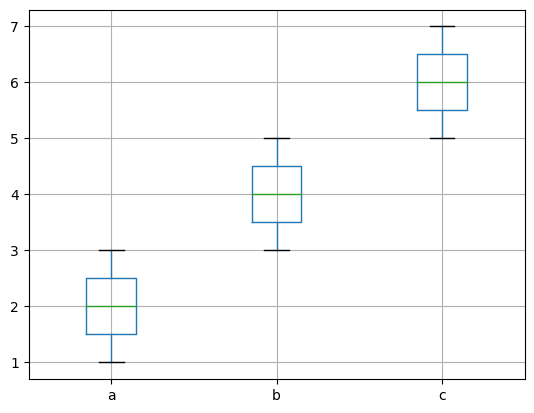

In [5]:
import pandas as pd
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw
f_value = mssb/mssw
p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

In [6]:
def conf_interval_norm(М_mean, sd, n, accuracy):
    se = sd/(n**(1/2))
    if accuracy == 95:
        di_1 = М_mean - se*1.96
        di_2 = М_mean + se*1.96
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
    elif accuracy == 99:
        di_1 = М_mean - se*2.58
        di_2 = М_mean + se*2.58
        print(f'Доверительный интервал для среднего: [{di_1} ; {di_2}]')
              
conf_interval_norm(7, 4, 100, 95)

Доверительный интервал для среднего: [6.216 ; 7.784]
